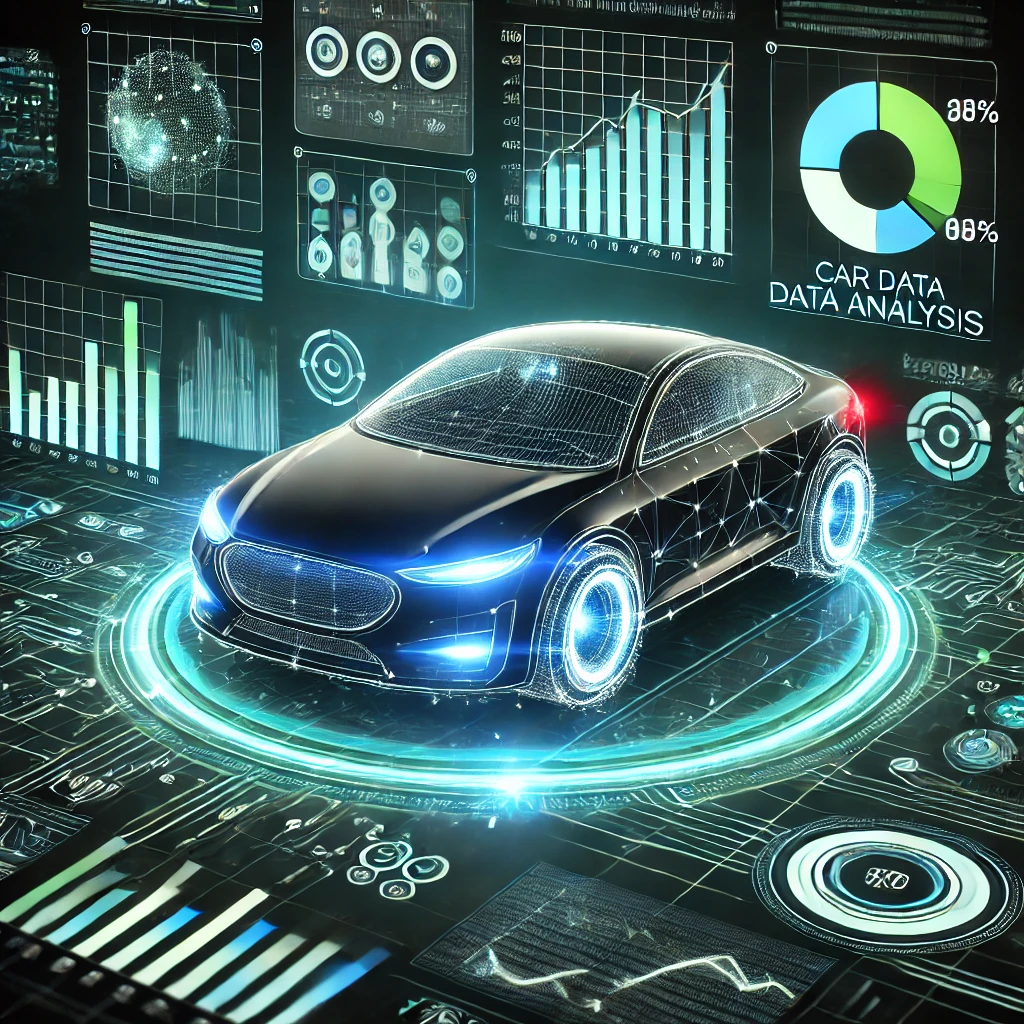

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression      
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import warnings
warnings.simplefilter(action="ignore")
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import itertools
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# 2. Pre-Processing

In [4]:
# Check hidden characters in column's name

for col in df.columns:
    print(repr(col))

'Car_Name'
'Year'
'Selling_Price'
'Present_Price'
'Kms_Driven'
'Fuel_Type'
'Seller_Type'
'Transmission'
'Owner'


In [5]:
# Check duplicates

duplicates = df.duplicated()
if duplicates.any():
    print ("Duplicates exist")
else:
    print("Duplicates do not exist")

Duplicates exist


In [6]:
# Extract duplicated rows
duplicate_rows = df[duplicates]
print(duplicate_rows)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Seller_Type Transmission  Owner  
17      Dealer       Manual      0  
93      Dealer    Automatic      0  


#### There are duplicates for 2015 and 2016. 

In [7]:
df[(df['Car_Name']== 'ertiga') & (df['Year']== 2016)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0


In [8]:
df[(df['Car_Name']== 'fortuner') & (df['Year']== 2015)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
51,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.reset_index()

,index,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
294,294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
# Convert "Year" feature to "Age"

df["Age"] = (df["Year"].max() + 1) - df["Year"]

In [13]:
df1 = df.drop(["Car_Name" , "Year"], axis = 1)
df1

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
295,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
296,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
297,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [14]:
df1.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478,5.384615
std,4.984240,8.567887,39015.170352,0.248720,2.896868
min,0.100000,0.320000,500.000000,0.000000,1.000000
25%,0.850000,1.200000,15000.000000,0.000000,3.000000
50%,3.510000,6.100000,32000.000000,0.000000,5.000000
75%,6.000000,9.840000,48883.500000,0.000000,7.000000
max,35.000000,92.600000,500000.000000,3.000000,16.000000


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  299 non-null    float64
 1   Present_Price  299 non-null    float64
 2   Kms_Driven     299 non-null    int64  
 3   Fuel_Type      299 non-null    object 
 4   Seller_Type    299 non-null    object 
 5   Transmission   299 non-null    object 
 6   Owner          299 non-null    int64  
 7   Age            299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.8+ KB


In [16]:
datatype = pd.DataFrame(df1.dtypes, columns=['Data Types'])
Null_Count = pd.DataFrame(df1.isnull().sum(), columns=['Null Count'])
data_table = pd.concat([datatype, Null_Count], axis='columns')
data_table

,Data Types,Null Count
Selling_Price,float64,0
Present_Price,float64,0
Kms_Driven,int64,0
Fuel_Type,object,0
Seller_Type,object,0
Transmission,object,0
Owner,int64,0
Age,int64,0


In [17]:
# Get the unique value of categorical features

Category = ["Fuel_Type","Seller_Type","Transmission"]
for i in Category: 
    print(i, "=", df[i].unique().tolist())

Fuel_Type = ['Petrol', 'Diesel', 'CNG']
Seller_Type = ['Dealer', 'Individual']
Transmission = ['Manual', 'Automatic']


In [18]:
# Count the number of sub-category under each category

counts= {}

for i in df1[["Fuel_Type",	"Seller_Type",	"Transmission"]]: 
    counts[i] = df1[i].value_counts()
    print("Value counts for {} \n".format(counts[i]))  

Value counts for Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64 

Value counts for Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64 

Value counts for Transmission
Manual       260
Automatic     39
Name: count, dtype: int64 



# 3. Visualization

## 3.1. Countplot

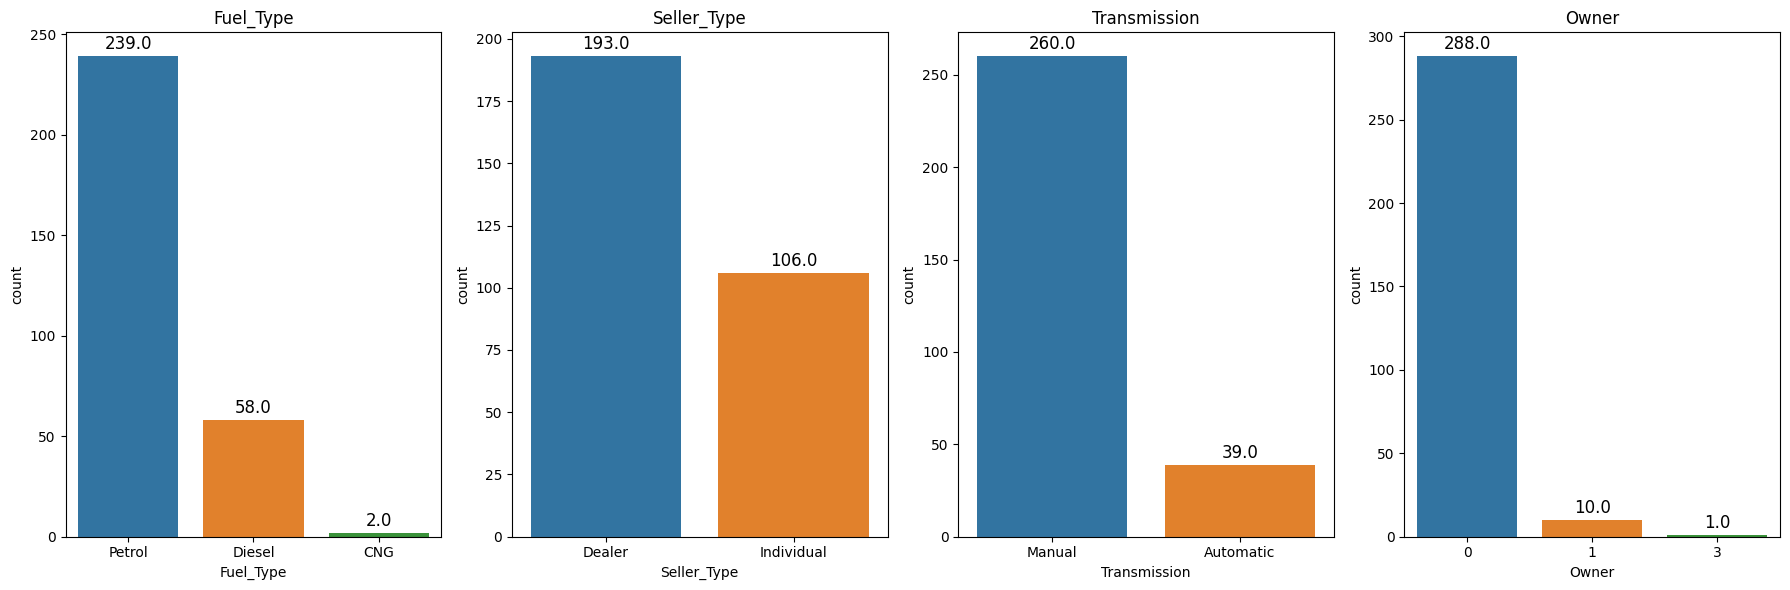

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(18, 6)) 

# Loop through the specified columns and create count plots
for j, column in enumerate(["Fuel_Type", "Seller_Type", "Transmission","Owner"]):
    sns.countplot(x=column, data=df1, ax=ax[j], palette="tab10")
    ax[j].set_title(column)  # Optional: Set the title to the column name

    # Add count labels on top of the bars
    for p in ax[j].patches:
        height = p.get_height()
        ax[j].annotate(f'{height}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.tight_layout() 
plt.show()


## 3.2. Plot target variable (Selling Price) versus "Present_Price" 
## variable  



**********   Present Price vs Selling Price   **********




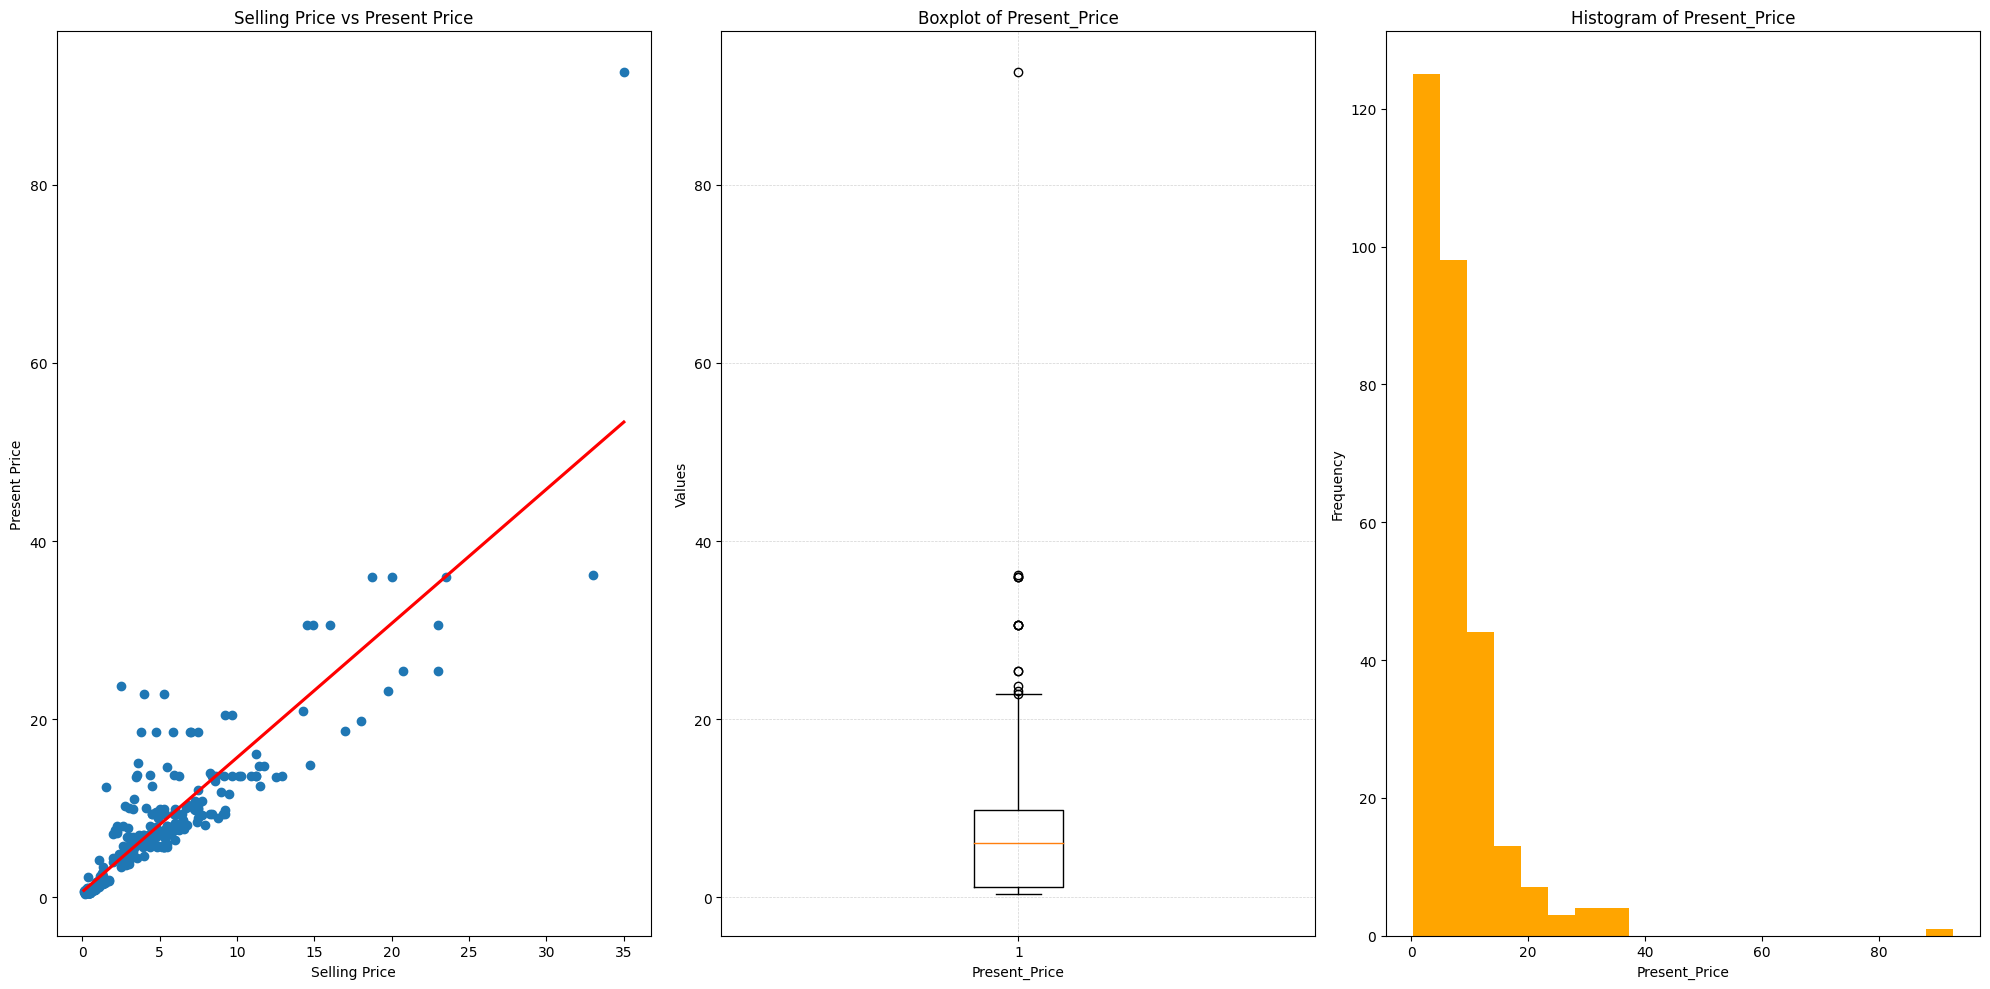

In [20]:

bold = "\033[1m"  # Bold text
blue =  "\033[34m"  # Red color

print(f"\n\n{bold}{blue}{'*' * 10}   Present Price vs Selling Price   {'*' * 10}\n\n")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

sns.regplot(x='Selling_Price', y='Present_Price', data=df1, ax=ax1, scatter_kws={'s':20}, line_kws={'color':'red'} , ci=None)
# Scatter plot: Selling Price vs Present Price
ax1.scatter(df1.Selling_Price, df1.Present_Price)
ax1.set_title("Selling Price vs Present Price")
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Present Price')

# Box plot: Selling Price
ax2.boxplot(df1.Present_Price)
ax2.set_title("Boxplot of Present_Price")
ax2.set_xlabel('Present_Price')
ax2.set_ylabel('Values')
ax2.grid(True, color='lightgray', linestyle='--', linewidth=0.5) 

# Example of another plot: let's say a histogram of Selling Price
ax3.hist(df1.Present_Price, bins=20, color='orange')
ax3.set_title("Histogram of Present_Price")
ax3.set_xlabel('Present_Price')
ax3.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### 3.2.1. Check noise

In [21]:
filter1 = df1[(df1["Selling_Price"] >25 ) & (df1["Present_Price"] > 30)]
filter1

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
63,33.0,36.23,6000,Diesel,Dealer,Automatic,0,2
85,35.0,92.60,78000,Diesel,Dealer,Manual,0,9


#### Observations:
#### These points raise doubts about whether it is noise. But, we can consider that these cars belong to 
#### a dealership and someone in the dealership has used them since they do not have a previous 
#### owner, and now they have decided to sell them. So, we keep the data points. 

## 3.3. Plot target variable (Selling Price) versus "Kms_Driven" variable



**********   Selling_Price vs Kms_Driven  **********




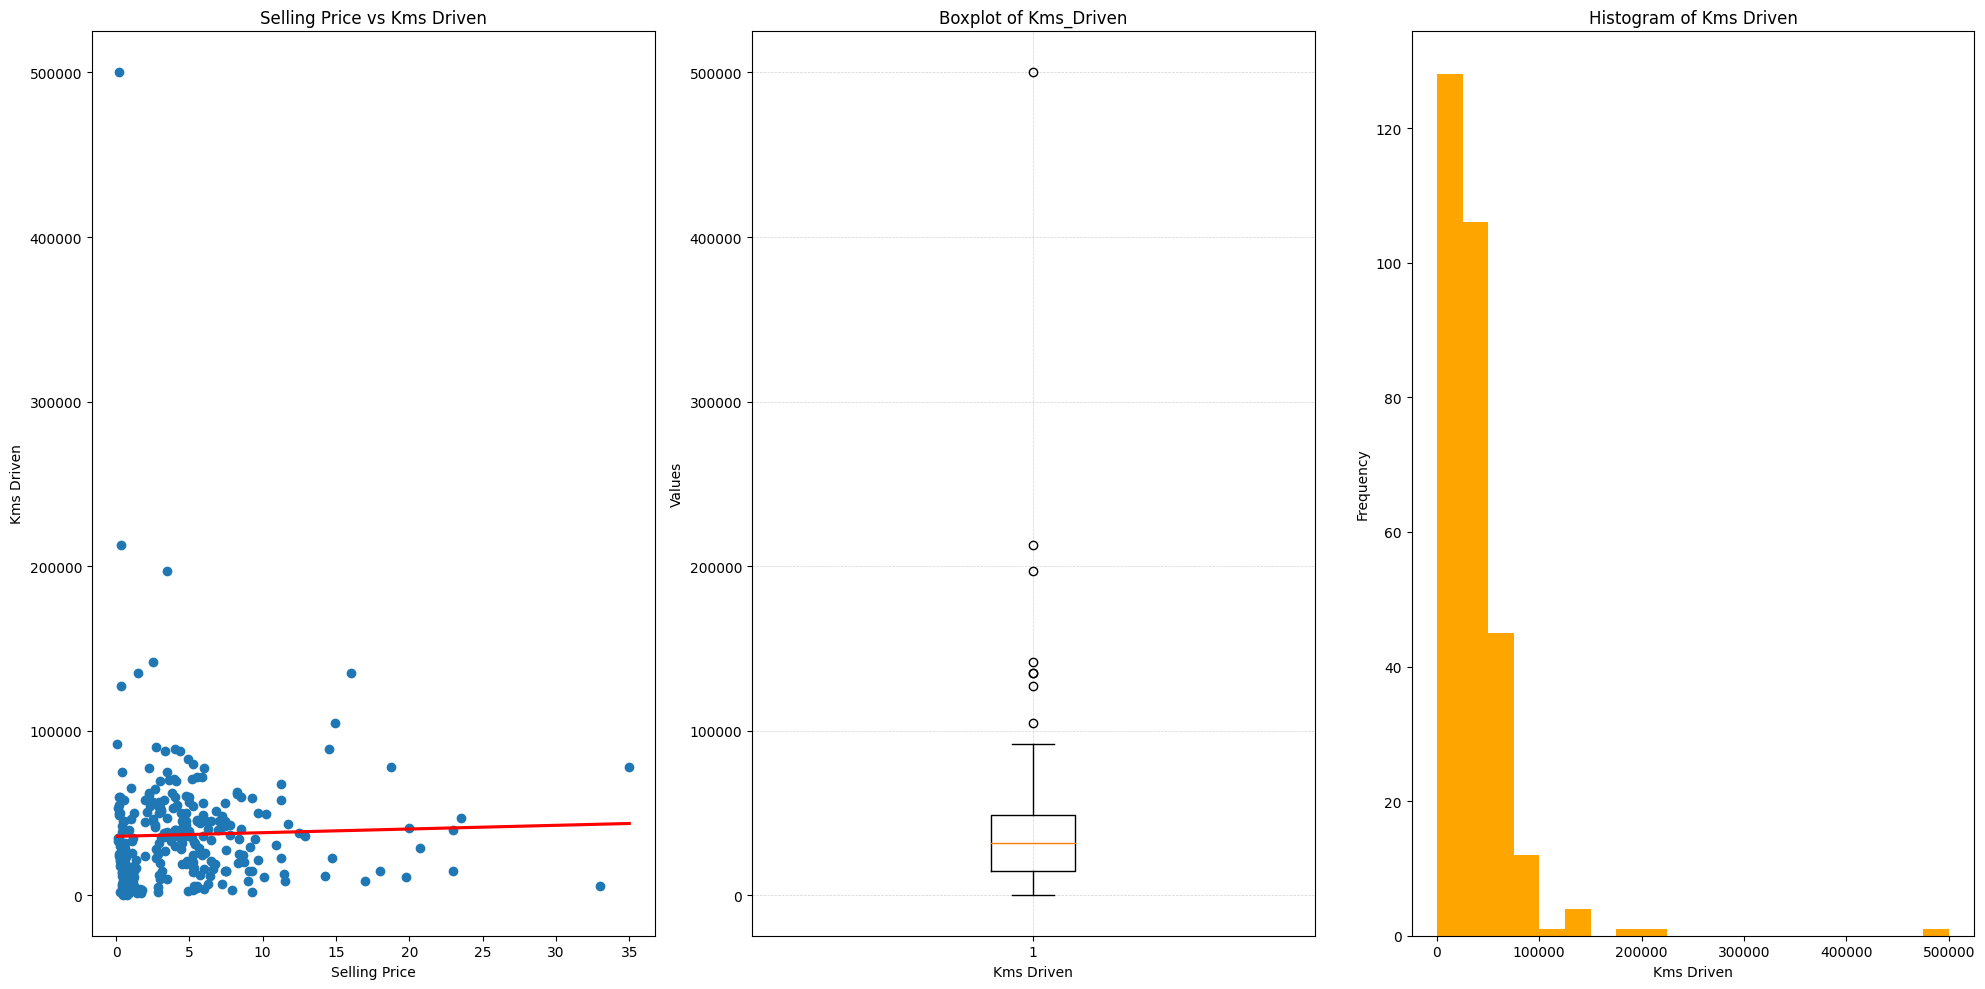

In [22]:

bold = "\033[1m"  # Bold text
blue =  "\033[34m"  # Red color
print(f"\n\n{bold}{blue}{'*' * 10}   Selling_Price vs Kms_Driven  {'*' * 10}\n\n")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

sns.regplot(x='Selling_Price', y='Kms_Driven', data=df1, ax=ax1, scatter_kws={'s':20}, line_kws={'color':'red'} , ci=None)
# Scatter plot: Selling Price vs Kms_Driven
ax1.scatter(df1.Selling_Price, df1.Kms_Driven)
ax1.set_title("Selling Price vs Kms Driven")
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Kms Driven')


# Box plot: Selling Price
ax2.boxplot(df1.Kms_Driven)
ax2.set_title("Boxplot of Kms_Driven")
ax2.set_xlabel('Kms Driven')
ax2.set_ylabel('Values')
ax2.grid(True, color='lightgray', linestyle='--', linewidth=0.5) 

# Example of another plot: let's say a histogram of Selling Price
ax3.hist(df1.Kms_Driven, bins=20, color='orange')
ax3.set_title("Histogram of Kms Driven")
ax3.set_xlabel('Kms Driven')
ax3.set_ylabel('Frequency')



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
filter2 = df1[(df1["Selling_Price"] > 30 )]
filter2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
63,33.0,36.23,6000,Diesel,Dealer,Automatic,0,2
85,35.0,92.60,78000,Diesel,Dealer,Manual,0,9


#### Observations:
#### Looking at different factors for selling price, I believe it makes sense to keep these datapoints 
#### rather than considering as noise.

In [24]:
filter3 = df1[(df1["Kms_Driven"] > 450000 )]
filter3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
194,0.17,0.52,500000,Petrol,Individual,Automatic,0,11


#### Observation:
#### There is no noise here as well. 

## 3.4 Plot target variable (Selling Price) versus "Owner" variable




**********   Selling_Price vs Owner	 **********




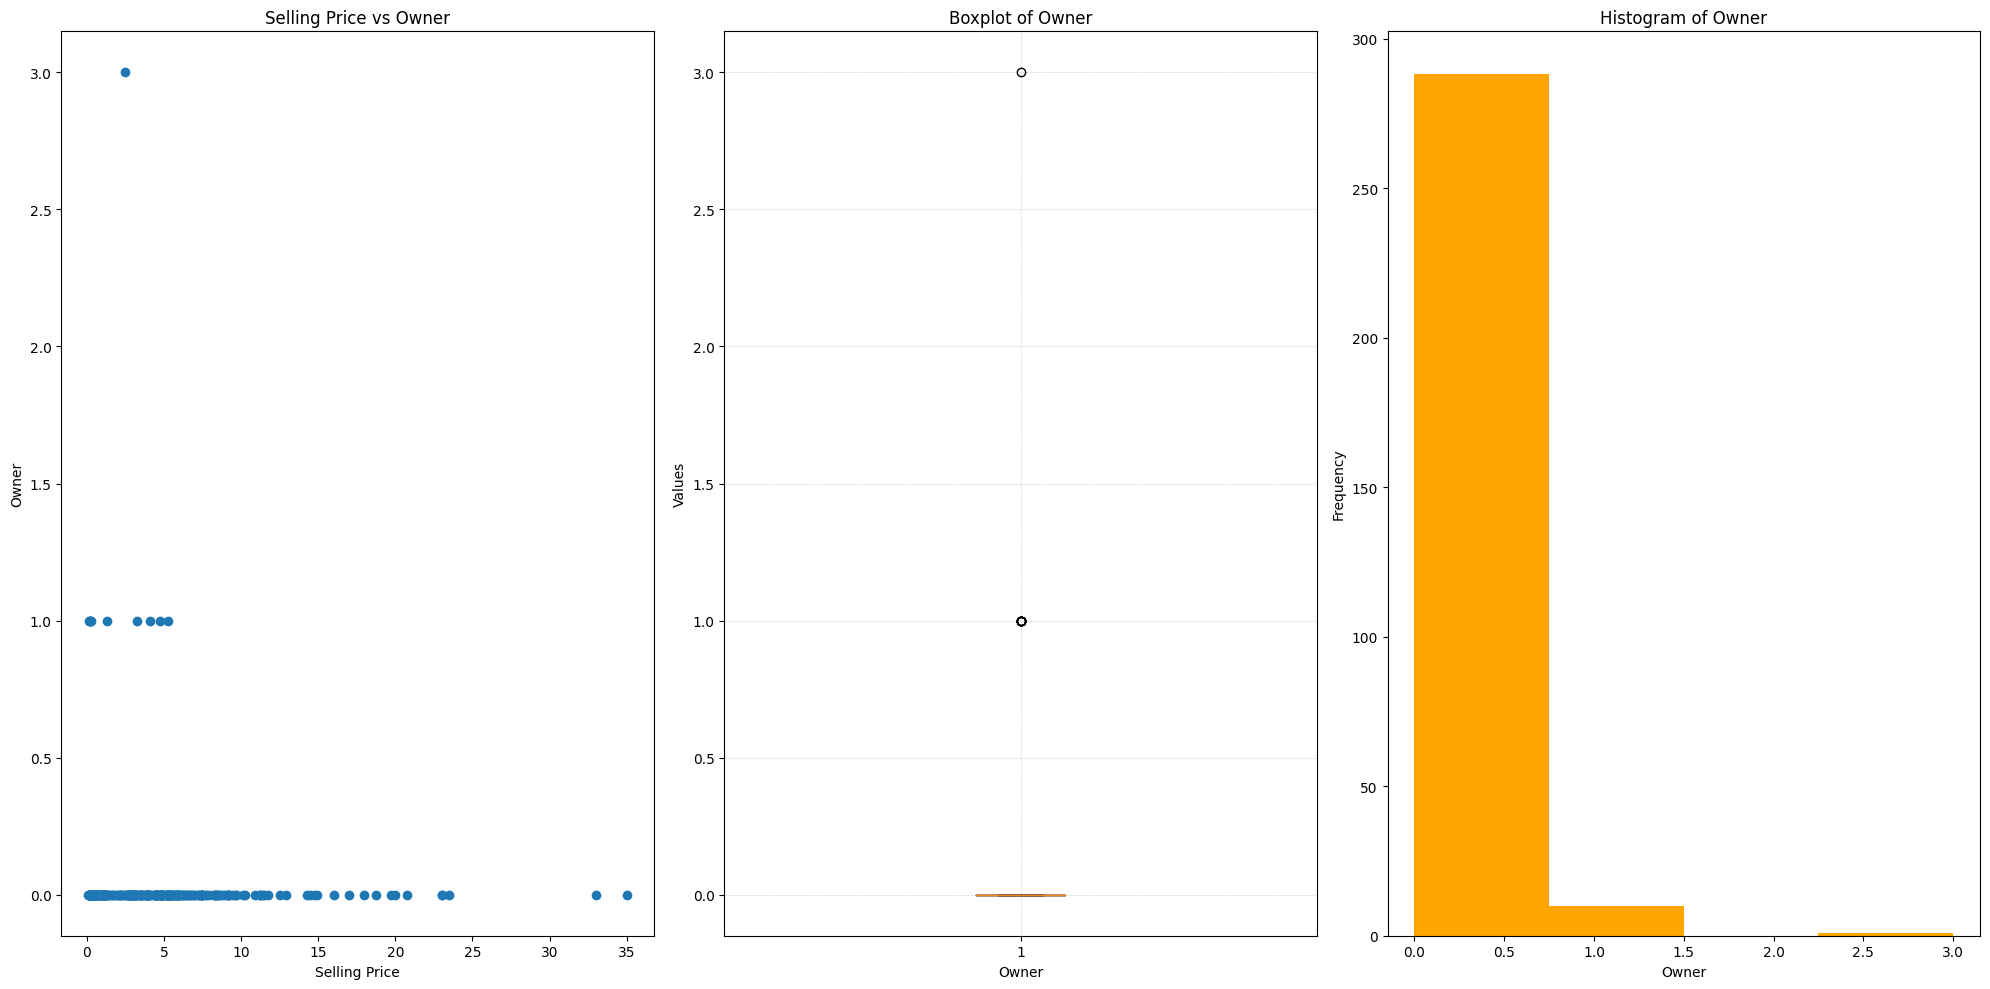

In [25]:

bold = "\033[1m"  # Bold text
blue =  "\033[34m"  # Red color

print(f"\n\n{bold}{blue}{'*' * 10}   Selling_Price vs Owner	 {'*' * 10}\n\n")


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.scatter(df1.Selling_Price, df1.Owner)
ax1.set_title("Selling Price vs Owner")
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Owner')

# Box plot: Selling Price
ax2.boxplot(df1.Owner)
ax2.set_title("Boxplot of Owner")
ax2.set_xlabel('Owner')
ax2.set_ylabel('Values')
ax2.grid(True, color='lightgray', linestyle='--', linewidth=0.5) 

# Example of another plot: let's say a histogram of Selling Price
ax3.hist(df1.Owner, bins=4, color='orange')
ax3.set_title("Histogram of Owner")
ax3.set_xlabel('Owner')
ax3.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## 3.5. Plot target variable (Selling Price) versus "Age" variable



**********   Selling_Price vs Age	 **********




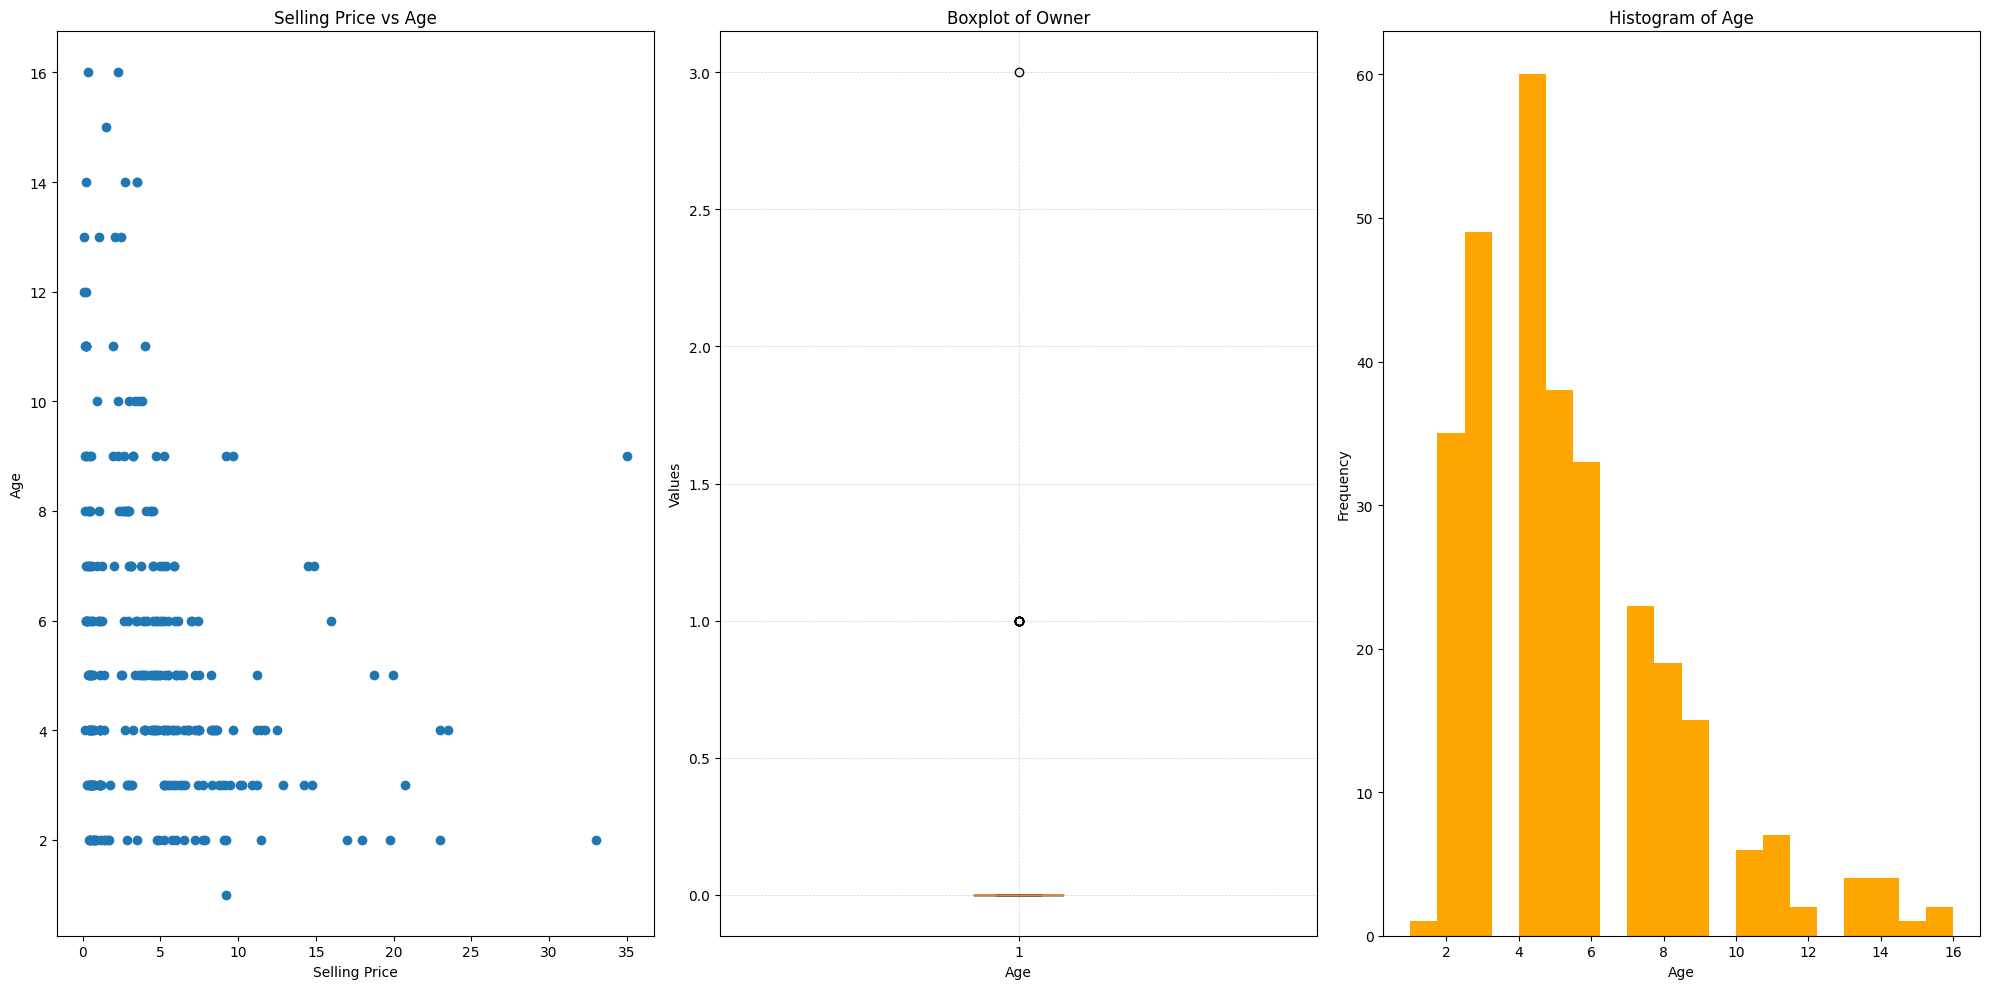

In [26]:
bold = "\033[1m"  # Bold text
red = "\033[31m"  # Red color
print(f"\n\n{bold}{red}{'*' * 10}   Selling_Price vs Age	 {'*' * 10}\n\n")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.scatter(df1.Selling_Price, df1.Age)
ax1.set_title("Selling Price vs Age")
ax1.set_xlabel('Selling Price')
ax1.set_ylabel('Age')

# Box plot: Selling Price
ax2.boxplot(df1.Owner)
ax2.set_title("Boxplot of Owner")
ax2.set_xlabel('Age')
ax2.set_ylabel('Values')
ax2.grid(True, color='lightgray', linestyle='--', linewidth=0.5) 

# Example of another plot: let's say a histogram of Selling Price
ax3.hist(df1.Age, bins=20, color='orange')
ax3.set_title("Histogram of Age")
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [27]:
numerical = df1[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age']]
numerical

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
0,3.35,5.59,27000,0,5
1,4.75,9.54,43000,0,6
2,7.25,9.85,6900,0,2
3,2.85,4.15,5200,0,8
4,4.60,6.87,42450,0,5
...,...,...,...,...,...
294,9.50,11.60,33988,0,3
295,4.00,5.90,60000,0,4
296,3.35,11.00,87934,0,10
297,11.50,12.50,9000,0,2


# 4. Convert categorical variables to numerical 

In [28]:
Category = ["Fuel_Type","Seller_Type","Transmission"]

for i in Category: 

    print(i, "=", df[i].unique().tolist())

Fuel_Type = ['Petrol', 'Diesel', 'CNG']
Seller_Type = ['Dealer', 'Individual']
Transmission = ['Manual', 'Automatic']


In [29]:
df2 = df1.copy()

df2['Fuel_Type'].replace(['Petrol', 'Diesel', "CNG"], [2, 3, 4], inplace=True)

df2['Seller_Type'].replace(['Dealer', 'Individual'], [2, 3], inplace=True)

df2['Transmission'].replace(['Manual', 'Automatic'], [2, 3], inplace=True)

In [30]:
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,3,2,2,0,3
295,4.00,5.90,60000,2,2,2,0,4
296,3.35,11.00,87934,2,2,2,0,10
297,11.50,12.50,9000,3,2,2,0,2


# 5. Histogram Plot of all variables

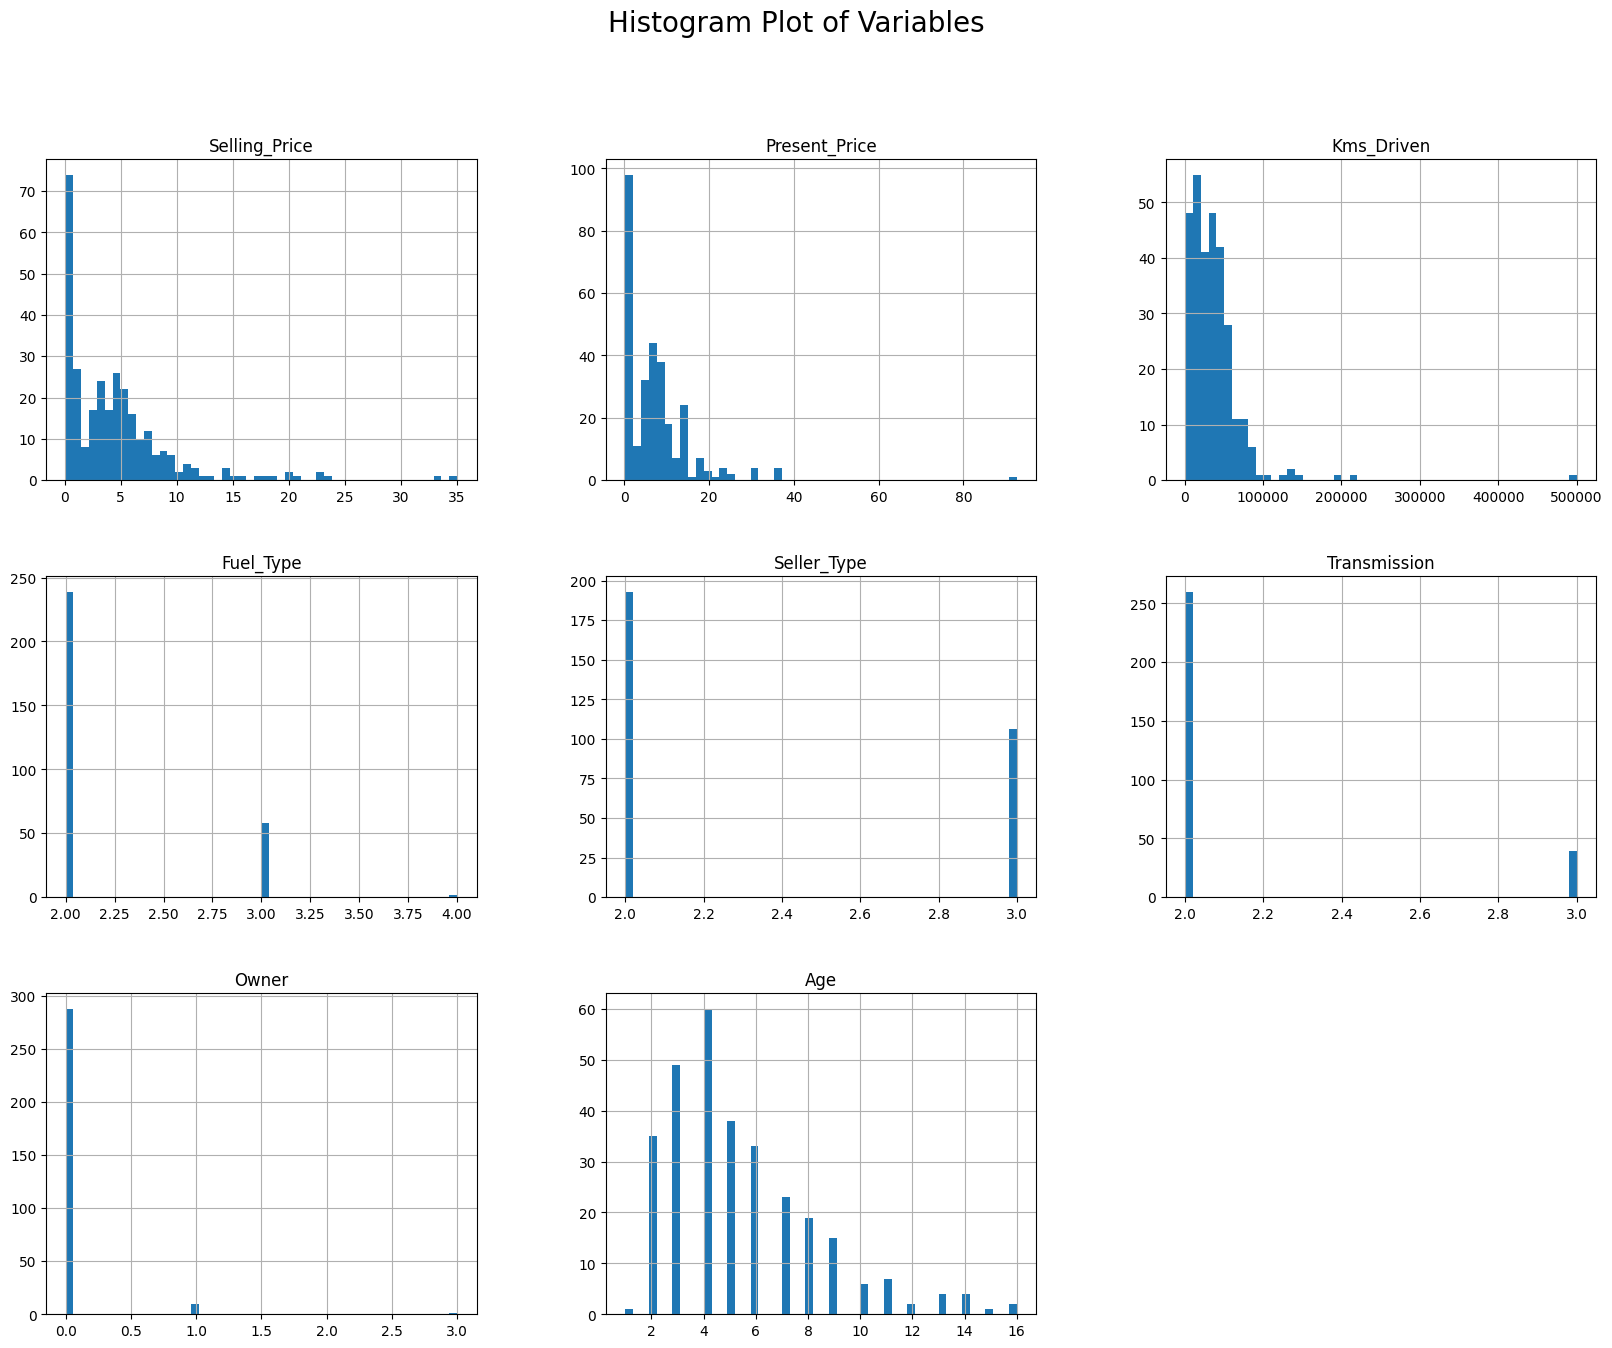

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

df2.hist(bins=50, figsize=(20,15))

plt.suptitle("Histogram Plot of Variables", fontsize=20)

plt.show()

## 5.1. Scatter Plot of all variables

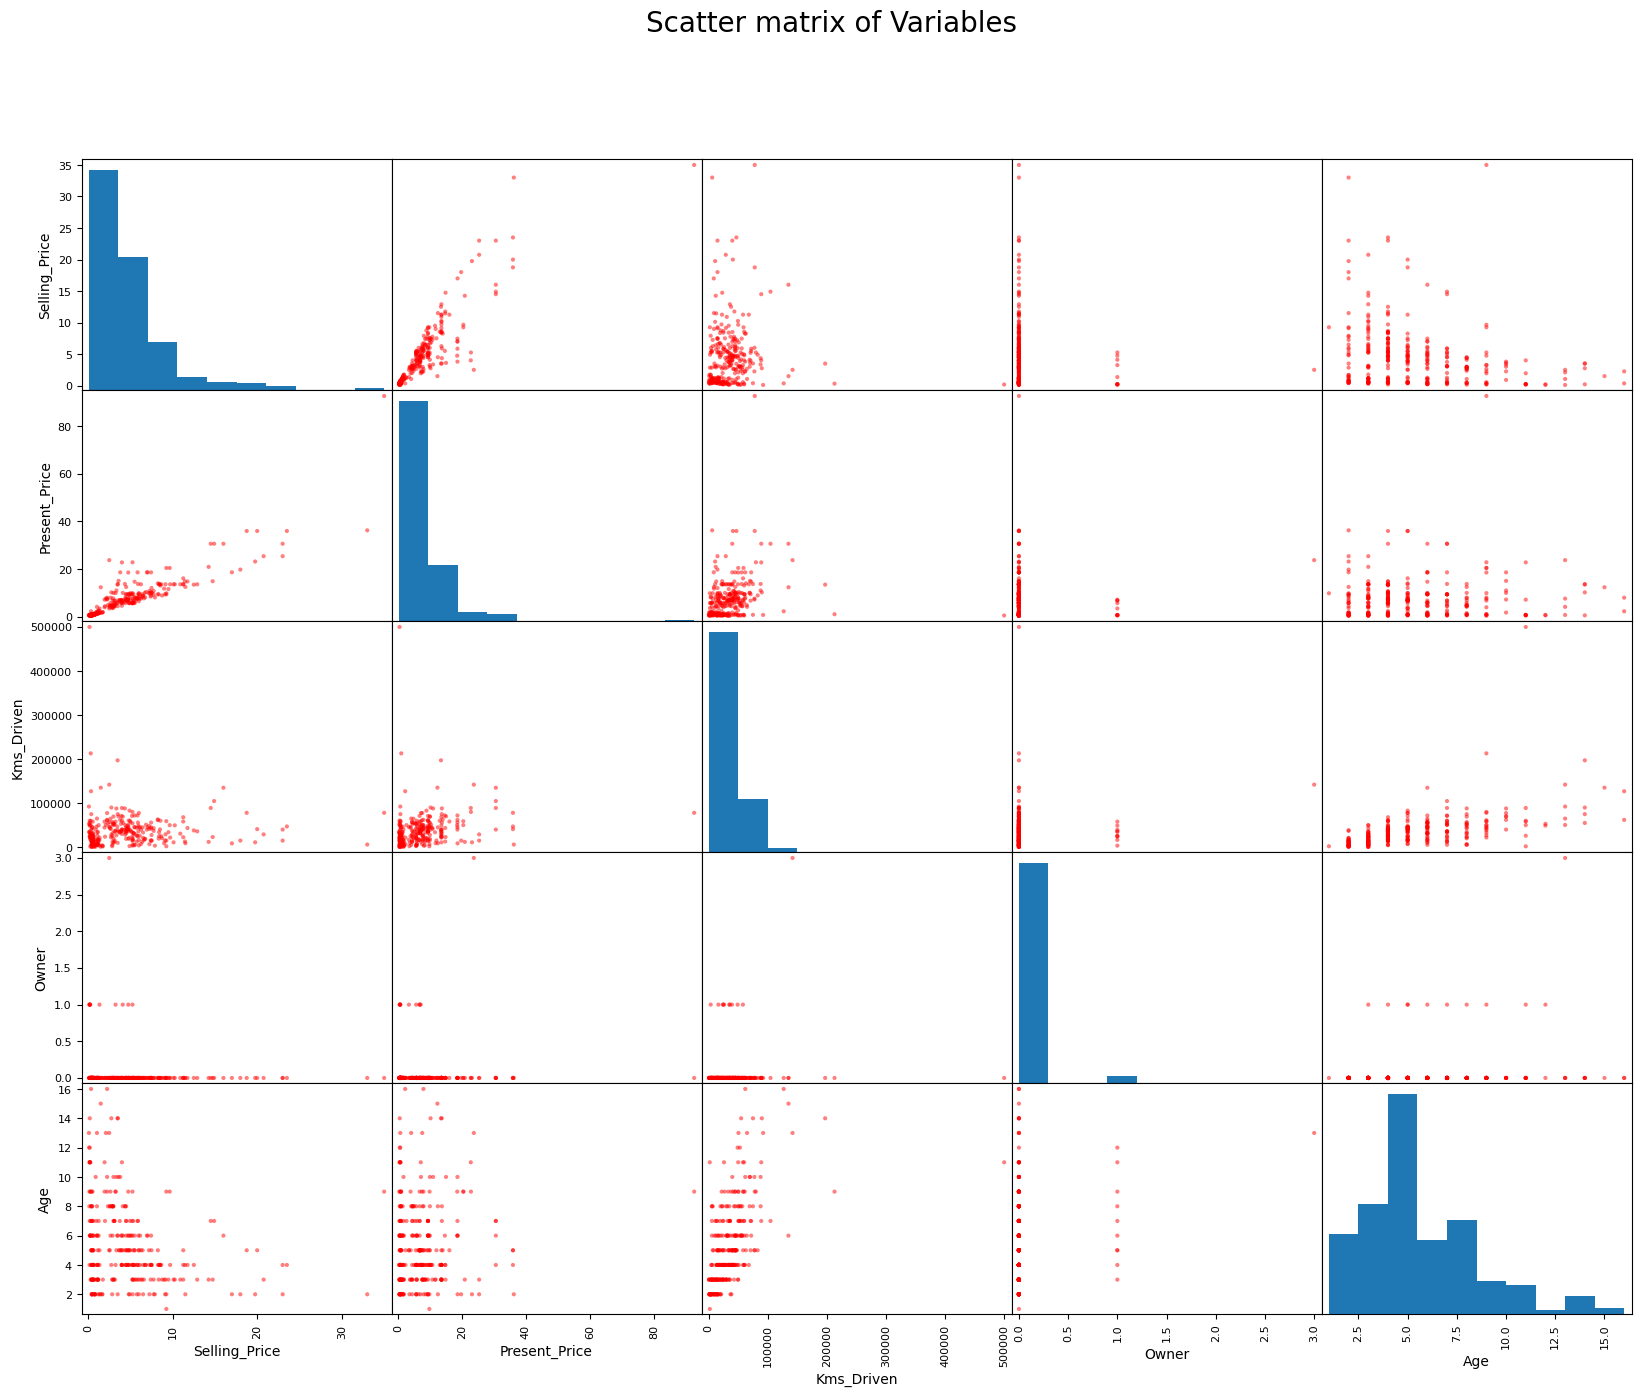

In [32]:

attributes = df2.columns

scatter_matrix(df1[attributes], figsize=(20,15), color='red')

plt.suptitle("Scatter matrix of Variables", fontsize=20)

plt.show()

## 5.2. Correlation Matrix of all variables

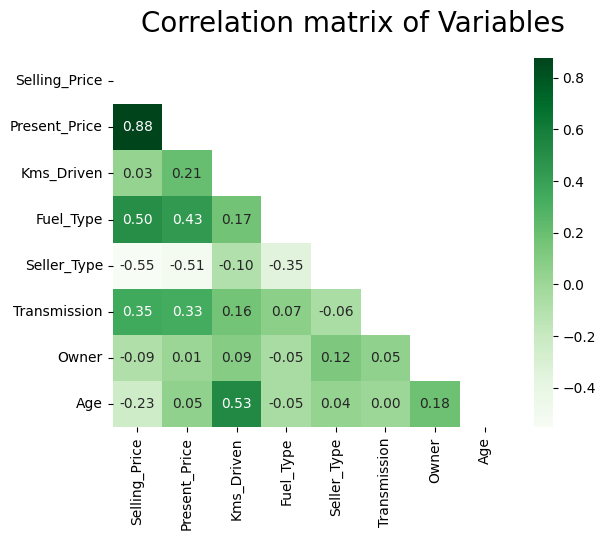

In [33]:
matrix = df2.corr()

sns.heatmap(matrix , cmap='Greens' , fmt='0.2f',  mask=np.triu(matrix), annot=True)

plt.suptitle("Correlation matrix of Variables", fontsize=20)

plt.show()

#### Observation:
#### Most important factors in order: Present_Price, Fuel_Type, Transmission

# 6. Create Train dataset

In [34]:
df3 = df2.drop("Selling_Price", axis = 1)

# 7. Normalize data using MinMaxScaler method

In [35]:
Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

norm1 = Scaler.fit_transform(df3)

norm1_df3 = pd.DataFrame(norm1, columns = ['Present_Price', 'Kms_Driven', 'Fuel_Type',

       'Seller_Type', 'Transmission', 'Owner', 'Age'])

norm1_df3.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667
1,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333
2,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667
3,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667
4,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667


In [36]:
norm1_df3.describe()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.078251,0.072906,0.103679,0.354515,0.130435,0.014493,0.292308
std,0.092847,0.078108,0.211149,0.479168,0.337346,0.082907,0.193125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009536,0.029029,0.000000,0.000000,0.000000,0.000000,0.133333
50%,0.062635,0.063063,0.000000,0.000000,0.000000,0.000000,0.266667
75%,0.103164,0.096864,0.000000,1.000000,0.000000,0.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 9. Create new dataset with Target variable and 
#    Nomalized train set

In [37]:
df4 = norm1_df3.copy()

In [38]:
# Adding "Selling_Price" feature to df4

df4["Selling_Price"] = df2["Selling_Price"] 

In [39]:
df4

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Selling_Price
0,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667,3.35
1,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333,4.75
2,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667,7.25
3,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667,2.85
4,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667,4.60
...,...,...,...,...,...,...,...,...
294,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333,9.50
295,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000,4.00
296,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000,3.35
297,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667,11.50


# 10. Regression Models

## 10.1. Regression Model with 80% - 20% train test split

In [40]:
X = df4.drop("Selling_Price", axis = 1)

y = df4["Selling_Price"].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Slope")
print(model.coef_)
print()
print("Model Intercept")
print(model.intercept_)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 =  metrics.r2_score(y_test, y_pred)

# Define the metrics

metrics_dict = {

    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score of Test Data'],

    'Value(80-20)': [MAE, MSE, RMSE, R2]
}


# Create a DataFrame
metrics_df = pd.DataFrame(metrics_dict)
metrics_df


Model Slope
[[41.0651884  -9.67294543  3.2186672  -1.40046729  1.3656271  -2.76774785
  -4.65670409]]

Model Intercept
[3.4864832]


,Metric,Value(80-20)
0,Mean Absolute Error,1.313557
1,Mean Squared Error,4.422234
2,Root Mean Squared Error,2.102911
3,R2 Score of Test Data,0.747183


In [41]:
num_columns = X_test.drop(["Fuel_Type", "Seller_Type", "Transmission", "Owner"], axis=1)

In [42]:
num_columns

,Present_Price,Kms_Driven,Age
206,0.084309,0.005876,0.066667
188,0.004660,0.119119,0.666667
12,0.104248,0.029029,0.200000
219,0.070113,0.063063,0.333333
237,0.044538,0.046464,0.400000
136,0.005960,0.029029,0.133333
228,0.098396,0.089089,0.333333
205,0.058301,0.068663,0.200000
52,0.328240,0.269269,0.333333
108,0.015821,0.011011,0.133333


### 10.1.1. Visualization of 80-20 Regression Model

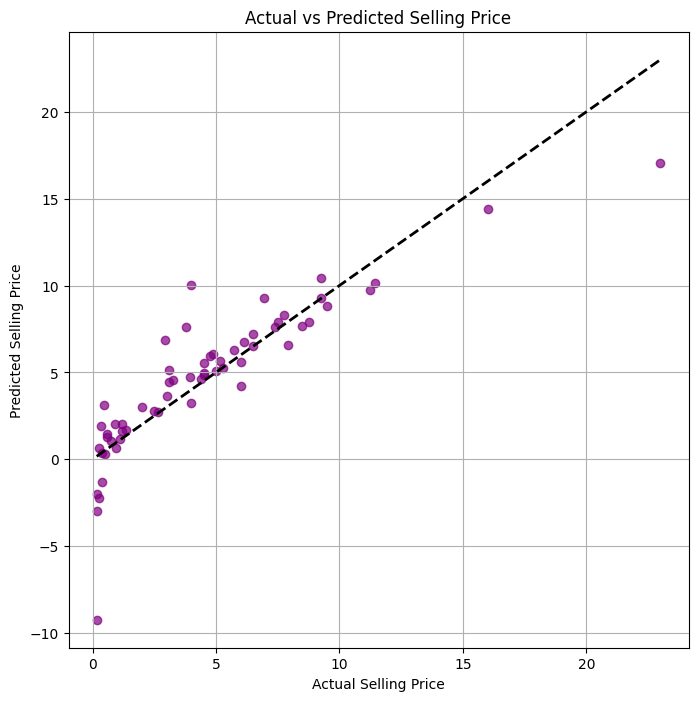

In [43]:
# Plot actual vs predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color="purple", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--", linewidth=2)  # Line of perfect prediction
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()


## 10.2. Regression Model with 70% - 30% train test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
model1 = LinearRegression(fit_intercept = True)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)


print("Model Slope")
print(model1.coef_)
print()
print("Model Intercept")
print(model1.intercept_)



# Calculate metrics

MAE = metrics.mean_absolute_error(y_test, y_pred1)
MSE = metrics.mean_squared_error(y_test, y_pred1)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
R2 =  metrics.r2_score(y_test, y_pred1)

# Define the metrics
metrics_dict1 = {

    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score of Test Data'],

    'Value (70-30)': [MAE, MSE, RMSE, R2]

}

# Create a DataFrame
metrics_df1 = pd.DataFrame(metrics_dict1)
metrics_df1

Model Slope
[[39.06173198 -7.70568344  2.90657824 -1.51150667  1.27206378 -2.93992263
  -4.50315457]]

Model Intercept
[3.49234828]


,Metric,Value (70-30)
0,Mean Absolute Error,1.229691
1,Mean Squared Error,4.600687
2,Root Mean Squared Error,2.144921
3,R2 Score of Test Data,0.809834


### 10.2.1. Visualization of 70-30 Regression Model

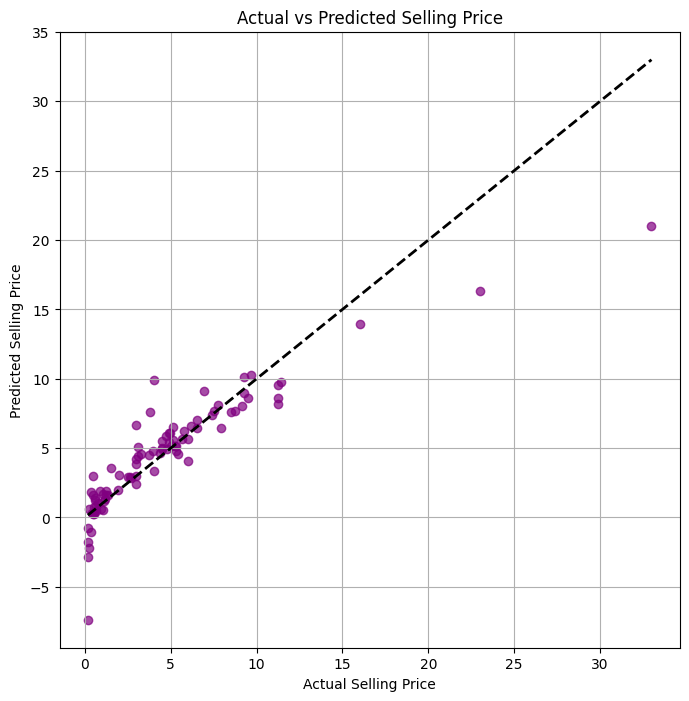

In [45]:
# Plot actual vs predicted

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred1, color="purple", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--", linewidth=2)  # Line of perfect prediction
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()


# 11. Model Comparison

In [46]:
df_concat = pd.concat([metrics_df, metrics_df1["Value (70-30)"]], axis=1)
df_concat

,Metric,Value(80-20),Value (70-30)
0,Mean Absolute Error,1.313557,1.229691
1,Mean Squared Error,4.422234,4.600687
2,Root Mean Squared Error,2.102911,2.144921
3,R2 Score of Test Data,0.747183,0.809834


#### Observation:
#### 70-30 is selected for further analysis

# 12. Calculate KFold for Cross Validation Method

In [47]:
k_values = []

mean_scores = []


for i in range(2, 21):
    kfold_validation= KFold(i , shuffle = True, random_state = 0) 
    results = cross_val_score(model1, X, y, cv = kfold_validation )
    mean_score = np.mean(results)

    # Store the results
    k_values.append(i)
    mean_scores.append(mean_score)
  

    # Create a DataFrame with K and Mean Score
    df_results = pd.DataFrame({
        'K': k_values,
        'Mean Score': mean_scores
})
df_results

,K,Mean Score
0,2,0.814835
1,3,0.833895
2,4,0.815287
3,5,0.816719
4,6,0.807464
5,7,0.823520
6,8,0.807610
7,9,0.812065
8,10,0.806752
9,11,0.804609


In [48]:
df_results["Mean Score"].max()

0.8338949171020834

In [49]:
value = df_results.loc[df_results['Mean Score'] == 0.8338949171020834, 'K'].values
value

array([3])

In [50]:
kfold_validation= KFold(n_splits=3 , shuffle = True , random_state = 0)
results = cross_val_score(model1, X, y, cv = kfold_validation )
print(results)
print(np.mean(results))

[0.80903918 0.8733479  0.81929767]
0.8338949171020834


# 13. Model Improvement

#### Many models were tried with different combinations of variables, two models increased accuracy 
#### and it was empirical. Let's check the models:

## 13.1. Model 1

In [51]:
df5 = df4.copy()

In [52]:
# Present_Price *Fuel_Type * Kms_Driven

PP_F_KD = df5.Present_Price * df5.Fuel_Type * df5.Kms_Driven
df5.insert(7, "PP_F_KD", PP_F_KD)

In [53]:
X = df5.drop("Selling_Price", axis = 1)
y = df5["Selling_Price"].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
model2 = LinearRegression(fit_intercept = True)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Calculate metrics
print("Model Slope")
print(model2.coef_)
print()
print("Model Intercept")
print(model2.intercept_)

MAE = metrics.mean_absolute_error(y_test, y_pred2)
MSE = metrics.mean_squared_error(y_test, y_pred2)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
R2 =  metrics.r2_score(y_test, y_pred2)

# Define the metrics
metrics_dict2 = {

    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],

    'Value(PP_F_KD)': [MAE, MSE, RMSE, R2]

}

# Create a DataFrame
metrics_df2 = pd.DataFrame(metrics_dict2)
metrics_df2

Model Slope
[[  47.55293401   -5.87200508    4.1515237    -0.7690913     1.0164372
    -4.09614223   -4.56520479 -136.832523  ]]

Model Intercept
[2.61834182]


,Metric,Value(PP_F_KD)
0,MAE,1.216688
1,MSE,4.097487
2,RMSE,2.024225
3,R2,0.830634


In [54]:
df_concat2 = pd.concat([df_concat, metrics_df2["Value(PP_F_KD)"]], axis=1)
df_concat2

,Metric,Value(80-20),Value (70-30),Value(PP_F_KD)
0,Mean Absolute Error,1.313557,1.229691,1.216688
1,Mean Squared Error,4.422234,4.600687,4.097487
2,Root Mean Squared Error,2.102911,2.144921,2.024225
3,R2 Score of Test Data,0.747183,0.809834,0.830634


#### Observation:
#### "The model's performance improved by approximately 3%, considering that other 
#### errors have decreased as well."

## 13.2. Model 2 

In [55]:
# Kms_Driven * Transmission * Owner

KD_T_O = df5.Kms_Driven * df5.Transmission * df5.Owner

df5.insert(8, "KD_T_O", KD_T_O)

In [56]:
X = df5.drop("Selling_Price", axis = 1)
y = df5["Selling_Price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
model3 = LinearRegression(fit_intercept = True)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

# Calculate metrics
print("Model Slope")
print(model3.coef_)
print()
print("Model Intercept")
print(model3.intercept_)

MAE = metrics.mean_absolute_error(y_test, y_pred3)
MSE = metrics.mean_squared_error(y_test, y_pred3)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
R2 =  metrics.r2_score(y_test, y_pred3)

# Define the metrics
metrics_dict3 = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value(KD_T_O)': [MAE, MSE, RMSE, R2]

}

# Create a DataFrame
metrics_df3 = pd.DataFrame(metrics_dict3)

metrics_df3

Model Slope
[[ 4.97128509e+01 -3.99006989e+00  4.25712749e+00 -5.11857052e-01
   1.13545754e+00  4.64093783e-02 -4.68952278e+00 -1.64861940e+02
  -2.88036272e+01]]

Model Intercept
[2.26013786]


,Metric,Value(KD_T_O)
0,MAE,1.156283
1,MSE,3.688707
2,RMSE,1.920601
3,R2,0.847530


In [57]:
df_concat3 = pd.concat([df_concat2, metrics_df3["Value(KD_T_O)"]], axis=1)
df_concat3

,Metric,Value(80-20),Value (70-30),Value(PP_F_KD),Value(KD_T_O)
0,Mean Absolute Error,1.313557,1.229691,1.216688,1.156283
1,Mean Squared Error,4.422234,4.600687,4.097487,3.688707
2,Root Mean Squared Error,2.102911,2.144921,2.024225,1.920601
3,R2 Score of Test Data,0.747183,0.809834,0.830634,0.847530


#### Observation:
#### In this model, three out of four factors have been improved.

## 13.3. Model 3

In [58]:
KM_S_O = df5.Kms_Driven * df5.Seller_Type * df5.Owner

df5.insert(9, "KM_S_O", KM_S_O)

In [59]:
X = df5.drop("Selling_Price", axis = 1)

y = df5["Selling_Price"].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
model4 = LinearRegression(fit_intercept = True)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

# Calculate metrics
print("Model Slope")
print(model4.coef_)
print()
print("Model Intercept")
print(model4.intercept_)


MAE = metrics.mean_absolute_error(y_test, y_pred4)
MSE = metrics.mean_squared_error(y_test, y_pred4)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred4))
R2 =  metrics.r2_score(y_test, y_pred4)

# Define the metrics
metrics_dict4 = {

    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],

    'Value(KM_S_O)': [MAE, MSE, RMSE, R2]

}

# Create a DataFrame
metrics_df4 = pd.DataFrame(metrics_dict4)
metrics_df4

Model Slope
[[  49.65548657   -3.97680876    4.25046262   -0.53363857    1.1353503
    -0.55008205   -4.70586533 -164.31909015  -54.50834146   27.91618069]]

Model Intercept
[2.2759164]


,Metric,Value(KM_S_O)
0,MAE,1.147219
1,MSE,3.655136
2,RMSE,1.911841
3,R2,0.848918


In [60]:
df_concat4 = pd.concat([df_concat3, metrics_df4["Value(KM_S_O)"]], axis=1)
df_concat4

,Metric,Value(80-20),Value (70-30),Value(PP_F_KD),Value(KD_T_O),Value(KM_S_O)
0,Mean Absolute Error,1.313557,1.229691,1.216688,1.156283,1.147219
1,Mean Squared Error,4.422234,4.600687,4.097487,3.688707,3.655136
2,Root Mean Squared Error,2.102911,2.144921,2.024225,1.920601,1.911841
3,R2 Score of Test Data,0.747183,0.809834,0.830634,0.847530,0.848918


## 13.4. Model 4

In [61]:
df5

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,PP_F_KD,KD_T_O,KM_S_O,Selling_Price
0,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667,0.000000,0.0,0.0,3.35
1,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333,0.004251,0.0,0.0,4.75
2,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,0.0,7.25
3,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667,0.000000,0.0,0.0,2.85
4,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667,0.002981,0.0,0.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...
294,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333,0.004098,0.0,0.0,9.50
295,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000,0.000000,0.0,0.0,4.00
296,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000,0.000000,0.0,0.0,3.35
297,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667,0.001123,0.0,0.0,11.50


In [62]:
df5 = df5.drop(["KM_S_O","PP_F_KD"], axis = 1)

In [63]:
interact = df5.Present_Price * df5.Age
df5.insert(8, "interact", interact)

In [64]:
df5 = df5.drop(["interact"], axis = 1)

In [65]:
df5

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,KD_T_O,Selling_Price
0,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667,0.0,3.35
1,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333,0.0,4.75
2,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667,0.0,7.25
3,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667,0.0,2.85
4,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667,0.0,4.60
...,...,...,...,...,...,...,...,...,...
294,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333,0.0,9.50
295,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000,0.0,4.00
296,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000,0.0,3.35
297,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667,0.0,11.50


## 13.5. Polynomial Regression

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Generate feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(input_features = X.columns)

num_poly_features = X_train_poly.shape[1]


# Track the best score, the best pair of features to add, and the final dataset
best_score = -np.inf
best_pair = None
best_MAE = None
best_MSE = None
best_RMSE = None

final_X_train = X_train.copy()
final_X_test = X_test.copy()
best_feature_names = []


# Generate all possible pairs of polynomial features

feature_pairs = list(itertools.combinations(range(num_poly_features), 2))

# Loop through all pairs of polynomial features

for pair in feature_pairs:
    
    # Combine single features with the selected pair of polynomial features

    X_train_combined = np.hstack((X_train, X_train_poly[:, [pair[0], pair[1]]]))
    X_test_combined = np.hstack((X_test, X_test_poly[:, [pair[0], pair[1]]]))

    
    # Train the model with the combined features

    model = LinearRegression()
    model.fit(X_train_combined, y_train)
    

    # Predict on the test set and calculate the R² score
    y_pred = model.predict(X_test_combined)
    score = metrics.r2_score(y_test, y_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))


    # Check if this score is better than the best score so far
    if score > best_score:
        best_score = score
        best_pair = pair
        best_MAE = MAE
        best_MSE = MSE
        best_RMSE = RMSE
        best_feature_names = [poly_feature_names[i] for i in pair]
print(f"Best pair of polynomial features to add: {best_feature_names}")

# Define the metrics
metrics_dict4 = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value(Polynomial)': [best_MAE, best_MSE, best_RMSE, best_score]
}

# Create a DataFrame
metrics_df4 = pd.DataFrame(metrics_dict4)
metrics_df4

Best pair of polynomial features to add: ['Present_Price Age', 'Kms_Driven Age']


,Metric,Value(Polynomial)
0,MAE,0.595779
1,MSE,0.738444
2,RMSE,0.859328
3,R2,0.969477


In [67]:
df_concat5 = pd.concat([df_concat4, metrics_df4["Value(Polynomial)"]], axis=1)
df_concat5

,Metric,Value(80-20),Value (70-30),Value(PP_F_KD),Value(KD_T_O),Value(KM_S_O),Value(Polynomial)
0,Mean Absolute Error,1.313557,1.229691,1.216688,1.156283,1.147219,0.595779
1,Mean Squared Error,4.422234,4.600687,4.097487,3.688707,3.655136,0.738444
2,Root Mean Squared Error,2.102911,2.144921,2.024225,1.920601,1.911841,0.859328
3,R2 Score of Test Data,0.747183,0.809834,0.830634,0.847530,0.848918,0.969477


#### Observation:
#### Based on results from table we can see that Polynomial is giving the highest R2Score, also other 
#### errors are siginificantly lower than previous improvements

In [68]:
new_entry = pd.DataFrame({
    'Present_Price': [11.23],
    'Kms_Driven': [42000],
    'Fuel_Type': [2],
    'Seller_Type': [2],
    'Transmission': [2],
    'Owner': [1],
    'Age': [10]

})

new_entry

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,11.23,42000,2,2,2,1,10


In [69]:
df_pred = pd.concat([df3, new_entry], ignore_index=True)
df_pred

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,2,2,0,5
1,9.54,43000,3,2,2,0,6
2,9.85,6900,2,2,2,0,2
3,4.15,5200,2,2,2,0,8
4,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...
295,5.90,60000,2,2,2,0,4
296,11.00,87934,2,2,2,0,10
297,12.50,9000,3,2,2,0,2
298,5.90,5464,2,2,2,0,3


# 14. Add new pairs of variables to dataset after final 
# improvement

#### Observation:
#### Best pair of polynomial features to add: ['Present_Price Age', 'Kms_Driven Age'], so we add these 
#### pairs to dataset as pair 1 and pair 2 respectively.

In [70]:
pair1 = df_pred.Present_Price * df_pred.Age
df_pred.insert(7, "pair1", pair1)

In [71]:
pair2 = df_pred.Kms_Driven * df_pred.Age
df_pred.insert(8, "pair2", pair2)

In [72]:
df_pred

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,pair1,pair2
0,5.59,27000,2,2,2,0,5,27.95,135000
1,9.54,43000,3,2,2,0,6,57.24,258000
2,9.85,6900,2,2,2,0,2,19.70,13800
3,4.15,5200,2,2,2,0,8,33.20,41600
4,6.87,42450,3,2,2,0,5,34.35,212250
...,...,...,...,...,...,...,...,...,...
295,5.90,60000,2,2,2,0,4,23.60,240000
296,11.00,87934,2,2,2,0,10,110.00,879340
297,12.50,9000,3,2,2,0,2,25.00,18000
298,5.90,5464,2,2,2,0,3,17.70,16392


# 15. Normalize new dataset using MinMaxScaler method

In [73]:
Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

norm2 = Scaler.fit_transform(df_pred)

norm_df_pred = pd.DataFrame(norm2, columns = ['Present_Price', 'Kms_Driven', 'Fuel_Type',

       'Seller_Type', 'Transmission', 'Owner', 'Age', "pair1", "pair2"])

norm_df_pred

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,pair1,pair2
0,0.057109,0.053053,0.0,0.0,0.0,0.000000,0.266667,0.032353,0.024279
1,0.099913,0.085085,0.5,0.0,0.0,0.000000,0.333333,0.067541,0.046649
2,0.103273,0.012813,0.0,0.0,0.0,0.000000,0.066667,0.022442,0.002237
3,0.041504,0.009409,0.0,0.0,0.0,0.000000,0.466667,0.038660,0.007293
4,0.070980,0.083984,0.5,0.0,0.0,0.000000,0.266667,0.040042,0.038329
...,...,...,...,...,...,...,...,...,...
295,0.060468,0.119119,0.0,0.0,0.0,0.000000,0.200000,0.027127,0.043375
296,0.115735,0.175043,0.0,0.0,0.0,0.000000,0.600000,0.130926,0.159651
297,0.131990,0.017017,0.5,0.0,0.0,0.000000,0.066667,0.028809,0.003001
298,0.060468,0.009938,0.0,0.0,0.0,0.000000,0.133333,0.020039,0.002708


## 15.1. Identify X, y and test data

In [74]:
norm_df_X = norm_df_pred.iloc[:299,:]  # new dataset with two interactive features
norm_df_y = df4["Selling_Price"].values.reshape(-1,1)   # target feature
norm_df_x_test = norm_df_pred.iloc[299:,:]  # data to predict "selling price" feature

In [75]:
norm_df_x_test

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,pair1,pair2
299,0.118227,0.083083,0.0,0.0,0.0,0.333333,0.6,0.133689,0.076112


In [76]:
X_new= norm_df_X
y = df4["Selling_Price"].values.reshape(-1,1)

# 16. Prediction with LinearRegression

In [77]:
X_train, X_test, y_train, y_test = train_test_split(norm_df_X, norm_df_y, test_size=0.3, random_state=0)

model5 = LinearRegression()
model5.fit(X_train, y_train)  
y_pred = model5.predict(norm_df_x_test)
y_pred

array([[3.45019176]])

# 17. Prediction with Polynomial Regression

In [78]:
X = norm_df_X
X_test = norm_df_x_test

In [79]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly  = poly.fit_transform(X)

model6 = LinearRegression()
model6.fit(X_poly, y)

X_new_poly = poly.transform(X_test)
y_pred = model6.predict(X_new_poly)

y_pred

array([[1.24529362]])